In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from env import host, username, password
import prepare
import wrangle
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
import explore
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
df = pd.read_csv('zillow_data.csv')

In [2]:
prep_df = wrangle.prep_zillow(df)

In [3]:
train, validate, test = wrangle.split_data(prep_df)

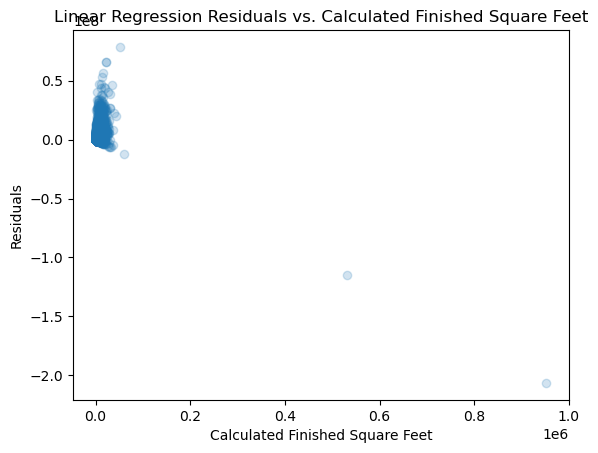

In [5]:
# Fit a linear regression model (ordinary least squares) and compute yhat,
# predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

# Prepare the input feature and target variable
X_train = train[['calculatedfinishedsquarefeet']]
y_train = train['taxvaluedollarcnt']

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate the residuals
residuals_train = y_train - y_pred_train

# Visualize the residuals
plt.scatter(X_train['calculatedfinishedsquarefeet'], residuals_train, alpha=0.2)
plt.xlabel('Calculated Finished Square Feet')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals vs. Calculated Finished Square Feet')
plt.show()


In [6]:
# Calculate the sum of squared errors,
# explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

# Calculate SSE, ESS, and TSS
SSE = np.sum((y_train - y_pred_train)**2)
ESS = np.sum((y_pred_train - np.mean(y_train))**2)
TSS = SSE + ESS

# Calculate MSE and RMSE
MSE = SSE / len(y_train)
RMSE = np.sqrt(MSE)

# Print the results
print('SSE:', SSE)
print('ESS:', ESS)
print('TSS:', TSS)
print('MSE:', MSE)
print('RMSE:', RMSE)


SSE: 4.89139642592127e+17
ESS: 1.1357460542045979e+17
TSS: 6.027142480125868e+17
MSE: 380908048720.6054
RMSE: 617177.4855911429


In [7]:
# Calculate the sum of squared errors, mean squared error, and root mean squared error
# for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

# Calculate the mean of the target variable
y_mean = np.mean(y_train)

# Create an array of the same shape as y_train with the mean value
y_pred_baseline = np.full_like(y_train, y_mean)

# Calculate SSE, MSE, and RMSE
SSE_baseline = np.sum((y_train - y_pred_baseline)**2)
MSE_baseline = SSE_baseline / len(y_train)
RMSE_baseline = np.sqrt(MSE_baseline)

# Print the results
print('SSE baseline:', SSE_baseline)
print('MSE baseline:', MSE_baseline)
print('RMSE baseline:', RMSE_baseline)


SSE baseline: 6.027142480125866e+17
MSE baseline: 469352078948.17365
RMSE baseline: 685092.7520768072


In [12]:
# Write python code that compares the sum of squared errors for your model against the sum of
# squared errors for the baseline model and outputs whether or not your model performs better
# than the baseline model.

# Compare SSE for the model and the baseline
if SSE < SSE_baseline:
    print("Linear regression model performs better than the baseline model.")
else:
    print("Baseline model performs better than the linear regression model.")



Linear regression model performs better than the baseline model.


In [17]:
# What is the amount of variance explained in your model?
# Calculate R-squared for the linear regression model
R_squared = model.score(X_train, y_train)
print("R-squared for the linear regression model:", R_squared)

R-squared for the linear regression model: 0.18843856071922138


In [18]:
# Is your model better than the baseline model?


# Calculate RMSE for the linear regression model
from sklearn.metrics import mean_squared_error
y_pred_train = model.predict(X_train)
RMSE_model = mean_squared_error(y_train, y_pred_train, squared=False)

# Calculate RMSE for the baseline model
y_mean_train = np.mean(y_train)
y_pred_baseline = np.full_like(y_train, y_mean_train)
RMSE_baseline = mean_squared_error(y_train, y_pred_baseline, squared=False)

# Compare RMSE for the model and the baseline
if RMSE_model < RMSE_baseline:
    print("Linear regression model performs better than the baseline model.")
else:
    print("Baseline model performs better than the linear regression model.")


Linear regression model performs better than the baseline model.
